In [1]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.support.ui import WebDriverWait as wait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException
from time import sleep
import re

# Setup Chrome Driver
service = Service(executable_path='/chromedriver_win32/chromedriver.exe')
driver = webdriver.Chrome(service=service)

# ---- Start of the first code ---- #


# Part 1: Scrape product details
base_url = 'https://www.amazon.com/s?k=headphone&page={page_num}&ref=sr_pg_{page_num}'
product_name = []
product_price = []
product_ratings = []
product_ratings_num = []
product_images = []
product_link = []


for i in range(1, 10):  # Adjust the range as needed
    driver.get(base_url.format(page_num=i))
    items = wait(driver, 10).until(EC.presence_of_all_elements_located((By.XPATH, '//div[contains(@class, "s-result-item s-asin")]')))
    
    for item in items:
        # Get the link
        link = item.find_element(By.XPATH, './/a[@class="a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal"]').get_attribute("href")
    
        # Check if the link is sponsored
        if "/sspa/" not in link:
            # Get the name of book
            name = item.find_element(By.XPATH, './/span[@class="a-size-medium a-color-base a-text-normal"]').text

            # Get the price
            whole_price_elements = item.find_elements(By.XPATH, './/span[@class="a-price-whole"]')
            fraction_price_elements = item.find_elements(By.XPATH, './/span[@class="a-price-fraction"]')

            if whole_price_elements and fraction_price_elements:
                price = '.'.join([whole_price_elements[0].text, fraction_price_elements[0].text])
            else:
                price = 0

            # Find ratings box
            ratings_box = item.find_elements(By.XPATH, './/div[@class="a-row a-size-small"]/span')

            # Find ratings and ratings_num
            if ratings_box:
                ratings = ratings_box[0].get_attribute('aria-label')
                ratings_num_str = ratings_box[1].get_attribute('aria-label')
                ratings_num = int(ratings_num_str.replace(",", ""))  # Convert ratings_num to integer, removing any commas
            else:
                ratings, ratings_num = 0, 0

            # Check the ratings_num and decide if the product should be added to the lists
            if ratings_num >= 1000:
                product_name.append(name)
                product_price.append(price)
                product_ratings.append(ratings)
                product_ratings_num.append(ratings_num_str)

               # Get image
                image_element = item.find_element(By.XPATH, './/div[@class="a-section aok-relative s-image-fixed-height"]/img')
                image_src = image_element.get_attribute("src")
                product_images.append(image_src)

               # Append the link (since we already fetched it)
                product_link.append(link)


# Part 2: Scrape product reviews
profile_names = []
review_ratings = []
review_title = []
review_content = []

MAX_RETRIES = 3  # Define the maximum number of retries

for link in product_link:
    # Extract ASIN (Amazon's unique product identifier) from the product link
    asin_match = re.search("/dp/([^/]+)", link)
    if asin_match:
        asin = asin_match.group(1)

        # Extract base URL for the product from the product link
        base_product_url = link.split("/dp/")[0]

        # Form the review URLs based on the base product URL and ASIN
        base_urls = [
            f'{base_product_url}/product-reviews/{asin}/ref=cm_cr_arp_d_viewopt_sr?ie=UTF8&reviewerType=all_reviews&filterByStar=five_star&pageNumber={{page_num}}',
            f'{base_product_url}/product-reviews/{asin}/ref=cm_cr_arp_d_viewopt_sr?ie=UTF8&reviewerType=all_reviews&filterByStar=four_star&pageNumber={{page_num}}',
            f'{base_product_url}/product-reviews/{asin}/ref=cm_cr_arp_d_viewopt_sr?ie=UTF8&reviewerType=all_reviews&filterByStar=three_star&pageNumber={{page_num}}'
        ]

        # Scrape review details for each URL
        for base_url in base_urls:
            for _ in range(1, 8):  # Assuming you want 9 pages for each star rating
                driver.get(base_url.format(page_num=_))
                
                try:
                    review_blocks = wait(driver, 0).until(EC.presence_of_all_elements_located((By.XPATH, '//div[contains(@id, "customer_review-")]')))
                    
                except TimeoutException:
                    print("No reviews found on the page. Moving to the next step.")
                    continue

                for block in review_blocks:
                    # Profile Names
                    try:
                        name = block.find_element(By.CSS_SELECTOR, '.a-profile-name')
                        profile_names.append(name.text)
                    except:
                        profile_names.append(None)

                    # Review Ratings
                    try:
                        rating = block.find_element(By.CSS_SELECTOR, '.a-icon-alt').get_attribute('innerHTML')
                        review_ratings.append(rating[:3])  # Extracting first 3 chars
                    except:
                        review_ratings.append(None)

                    # Review Titles
                    try:
                        title = block.find_element(By.CSS_SELECTOR, '.review-title-content > span:last-child')
                        review_title.append(title.text)
                    except:
                        review_title.append(None)

                    # Review Content
                    try:
                        content = block.find_element(By.CSS_SELECTOR, '.review-text-content > span')
                        review_content.append(content.text)
                    except:
                        review_content.append(None)
                sleep(0)  # 5-second pause between pages
    else:
        print(f"Could not extract ASIN from the link: {link}")
        continue

# Close the driver
driver.quit()



Error getting version of chromedriver 116. Retrying with chromedriver 115 (attempt 1/5)
Error getting version of chromedriver 115. Retrying with chromedriver 114 (attempt 2/5)


No reviews found on the page. Moving to the next step.
No reviews found on the page. Moving to the next step.


NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=114.0.5735.0)
Stacktrace:
Backtrace:
	GetHandleVerifier [0x004EA813+48355]
	(No symbol) [0x0047C4B1]
	(No symbol) [0x00385358]
	(No symbol) [0x0036D293]
	(No symbol) [0x003CE37B]
	(No symbol) [0x003DC473]
	(No symbol) [0x003CA536]
	(No symbol) [0x003A82DC]
	(No symbol) [0x003A93DD]
	GetHandleVerifier [0x0074AABD+2539405]
	GetHandleVerifier [0x0078A78F+2800735]
	GetHandleVerifier [0x0078456C+2775612]
	GetHandleVerifier [0x005751E0+616112]
	(No symbol) [0x00485F8C]
	(No symbol) [0x00482328]
	(No symbol) [0x0048240B]
	(No symbol) [0x00474FF7]
	BaseThreadInitThunk [0x772A7D59+25]
	RtlInitializeExceptionChain [0x77DAB79B+107]
	RtlClearBits [0x77DAB71F+191]


In [18]:
df_products = pd.DataFrame({
    "Product name": product_name,
    "Price": product_price,
    "Rating stars": product_ratings,
    "Rating count": product_ratings_num,
    "Link": product_link,
    "image": product_images
})

df_reviews = pd.DataFrame({
    'Profile Names': profile_names,
    'Review Ratings': review_ratings,
    'Review Title': review_title,
    'Review Content': review_content
})

In [19]:
#1. Add an index column to both df_products and df_reviews
df_products["product_index"] = df_products.index
df_reviews["product_index"] = df_reviews.index // (df_reviews.shape[0] // df_products.shape[0])  # Assuming each product has roughly the same number of reviews.

# 2. Merge the two dataframes on this index
df_combined = pd.merge(df_reviews, df_products, on="product_index", how="left")

# 3. Select only the columns you need
df = df_combined[['Profile Names', 'Product name', 'Price', 'Rating stars', 'Link', 'image', 'Review Ratings', 'Review Title', 'Review Content']]



In [20]:
df

,Profile Names,Product name,Price,Rating stars,Link,image,Review Ratings,Review Title,Review Content
0,Adam J Ellington,Bluetooth Headphones Wireless Earbuds 80hrs Pl...,37.99,4.8 out of 5 stars,https://www.amazon.com/Bluetooth-Headphones-Wi...,https://m.media-amazon.com/images/I/71G9a1iSpH...,5.0,VERY good value. Seems it would be hard to go ...,"TL,DR: These are a surefire pick at the price ..."
1,Shopper,Bluetooth Headphones Wireless Earbuds 80hrs Pl...,37.99,4.8 out of 5 stars,https://www.amazon.com/Bluetooth-Headphones-Wi...,https://m.media-amazon.com/images/I/71G9a1iSpH...,5.0,Easy to use!,These are my first wireless headphones. I’ve b...
2,Nelbert,Bluetooth Headphones Wireless Earbuds 80hrs Pl...,37.99,4.8 out of 5 stars,https://www.amazon.com/Bluetooth-Headphones-Wi...,https://m.media-amazon.com/images/I/71G9a1iSpH...,5.0,Superlative in design and quality,I received my earbuds the other day and have b...
3,Raul Lozano,Bluetooth Headphones Wireless Earbuds 80hrs Pl...,37.99,4.8 out of 5 stars,https://www.amazon.com/Bluetooth-Headphones-Wi...,https://m.media-amazon.com/images/I/71G9a1iSpH...,5.0,Best headphones out there!,"In the ever-evolving world of wireless audio, ..."
4,John Howe,Bluetooth Headphones Wireless Earbuds 80hrs Pl...,37.99,4.8 out of 5 stars,https://www.amazon.com/Bluetooth-Headphones-Wi...,https://m.media-amazon.com/images/I/71G9a1iSpH...,5.0,Seems impressive..../UPDATED,So far so good....I just received them and plu...
...,...,...,...,...,...,...,...,...,...
16087,Patty,NaN,NaN,NaN,NaN,NaN,3.0,This style Fit is Not For Work Out or fitness ...,"While working out, the ear pieces keep moving ..."
16088,Emm,NaN,NaN,NaN,NaN,NaN,3.0,Won’t stay on the ears fall off you if you ben...,*Material is great looks is nice* sound is nic...
16089,Britboy,NaN,NaN,NaN,NaN,NaN,3.0,Keeps falling out of ears due to weight vs ear...,The lead and seems to weigh this down and pull...
16090,Stirfry,NaN,NaN,NaN,NaN,NaN,3.0,Poor microphone. everything else perfect,Music sound quality: great\nbattery life: good...


In [21]:
df.to_csv("headphone.csv", index=False)

In [74]:
df_mouse = data
df_mouse

,Profile Names,Headphone name,Price,Rating stars,Link,image,Review Ratings,Review Title,Review Content,Cleaned Review Content,Polarity,Subjectivity
0,Banco Exterior,"TECKNET Wireless Mouse, 2.4G Ergonomic Optical...",11.99,4.5,https://www.amazon.com/TeckNet-Ergonomic-Wirel...,https://m.media-amazon.com/images/I/71MCmrKFCN...,5.0,Comfortable and Reliable,Wireless Connectivity and Plug-and-Play:\nThe ...,wireless connectivity wireless connectivity en...,0.234524,0.519689
1,Isaac M.,"TECKNET Wireless Mouse, 2.4G Ergonomic Optical...",11.99,4.5,https://www.amazon.com/TeckNet-Ergonomic-Wirel...,https://m.media-amazon.com/images/I/71MCmrKFCN...,5.0,Perfect every day mouse,I bought this wireless mouse for my laptop and...,bought wireless mouse laptop happy easy set pl...,0.553571,0.726905
2,Heather,"TECKNET Wireless Mouse, 2.4G Ergonomic Optical...",11.99,4.5,https://www.amazon.com/TeckNet-Ergonomic-Wirel...,https://m.media-amazon.com/images/I/71MCmrKFCN...,5.0,Mouse,I've been using the TECKNET Wireless Mouse for...,using tecknet wireless mouse week really happy...,0.356875,0.630625
3,T’Lynn,"TECKNET Wireless Mouse, 2.4G Ergonomic Optical...",11.99,4.5,https://www.amazon.com/TeckNet-Ergonomic-Wirel...,https://m.media-amazon.com/images/I/71MCmrKFCN...,5.0,Great mouse,Idk if it was just me or my computer 💻 but I h...,idk computer little bit trouble connecting com...,0.004167,0.533333
4,Mia,"TECKNET Wireless Mouse, 2.4G Ergonomic Optical...",11.99,4.5,https://www.amazon.com/TeckNet-Ergonomic-Wirel...,https://m.media-amazon.com/images/I/71MCmrKFCN...,5.0,Great little wireless mouse !,"While looking for a wireless mouse, I knew 2 t...",looking wireless mouse knew thing wanted feel ...,0.394444,0.641667
...,...,...,...,...,...,...,...,...,...,...,...,...
9633,joanna lewis,NaN,NaN,NaN,NaN,NaN,3.0,Pretty good,"My Likes:\n1) It's fun and creative, makes you...",like fun creative make think thing involves an...,-0.014286,0.757143
9634,Swank Ivy,NaN,NaN,NaN,NaN,NaN,3.0,"Quirky mouse, fun characters",I didn't much relate to the mouse who had the ...,much relate mouse motorcycle maybe cleary atte...,0.125000,0.225000
9635,Retail Shopper,NaN,NaN,NaN,NaN,NaN,3.0,Great book,My daughter is 8 and loves this book. The char...,daughter love book character engaging excellen...,0.475000,0.606250
9636,Amazon Woman,NaN,NaN,NaN,NaN,NaN,3.0,Great story. Whiny narration.,"My son loves this series. The story, of course...",son love series story course wonderful wong na...,0.233333,0.750000


In [75]:
missing_values = df_mouse.isnull().sum()

# Drop rows where 'Review Content' is missing, as it's crucial for NLP analysis
df_mouse = df_mouse.dropna(subset=['Review Content'])

# Step 2: Clean Rating Columns

# Extract numeric rating from the 'Rating stars' column
df_mouse['Rating stars'] = df_mouse['Rating stars'].str.extract('(\d+\.\d+)').astype(float)

missing_values, df_mouse.head()

AttributeError: Can only use .str accessor with string values!

In [76]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
from langdetect import detect

ModuleNotFoundError: No module named 'langdetect'

In [63]:
# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    """
    Function to clean text data

    """
    try:
        language = detect(text)
    except:
        return None  # If langdetect fails (e.g., text is too short), return None
    
    # If text is not in English, return None
    if language != 'en':
        return None
    # Convert to lowercase
    text = text.lower()
    
    # Tokenization: Split the text into words
    tokens = nltk.word_tokenize(text)
    
    # Remove punctuation and non-alphabetic tokens
    tokens = [word for word in tokens if word.isalpha()]
    
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Join the cleaned tokens back into a string
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text

# Apply the cleaning function to the 'Review Content' column
df['Cleaned Review Content'] = df['Review Content'].apply(clean_text)
df = df_mouse.dropna(subset=['cleaned_reviews Content'])

# Display the original and cleaned review content for comparison
df[['Review Content', 'Cleaned Review Content']]

C:\Users\amine\AppData\Local\Temp\ipykernel_6304\1602613235.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mouse['Cleaned Review Content'] = df_mouse['Review Content'].apply(clean_text)


,Review Content,Cleaned Review Content
0,Wireless Connectivity and Plug-and-Play:\nThe ...,wireless connectivity wireless connectivity en...
1,I bought this wireless mouse for my laptop and...,bought wireless mouse laptop happy easy set pl...
2,I've been using the TECKNET Wireless Mouse for...,using tecknet wireless mouse week really happy...
3,Idk if it was just me or my computer 💻 but I h...,idk computer little bit trouble connecting com...
4,"While looking for a wireless mouse, I knew 2 t...",looking wireless mouse knew thing wanted feel ...


In [65]:
df_mouse['Cleaned Review Content']

0       wireless connectivity wireless connectivity en...
1       bought wireless mouse laptop happy easy set pl...
2       using tecknet wireless mouse week really happy...
3       idk computer little bit trouble connecting com...
4       looking wireless mouse knew thing wanted feel ...
                              ...                        
9633    like fun creative make think thing involves an...
9634    much relate mouse motorcycle maybe cleary atte...
9635    daughter love book character engaging excellen...
9636    son love series story course wonderful wong na...
9637    mouse motorcycle beverly cleary harper trophy ...
Name: Cleaned Review Content, Length: 9623, dtype: object

In [67]:
from textblob import TextBlob

# Function to compute sentiment scores
def compute_sentiment(text):
    try:
        # Calculating the sentiment
        blob = TextBlob(str(text))
        return blob.sentiment
    except:
        return (0.0, 0.0)

# Apply sentiment analysis on the Review Content column
df_mouse['Polarity'], df_mouse['Subjectivity'] = zip(*df_mouse['Cleaned Review Content'].apply(compute_sentiment))

# Display the first few rows with the new columns added
df_mouse[['Cleaned Review Content', 'Polarity', 'Subjectivity']].head()

C:\Users\amine\AppData\Local\Temp\ipykernel_6304\1429850055.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mouse['Polarity'], df_mouse['Subjectivity'] = zip(*df_mouse['Cleaned Review Content'].apply(compute_sentiment))
C:\Users\amine\AppData\Local\Temp\ipykernel_6304\1429850055.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mouse['Polarity'], df_mouse['Subjectivity'] = zip(*df_mouse['Cleaned Review Content'].apply(compute_sentiment))


,Cleaned Review Content,Polarity,Subjectivity
0,wireless connectivity wireless connectivity en...,0.234524,0.519689
1,bought wireless mouse laptop happy easy set pl...,0.553571,0.726905
2,using tecknet wireless mouse week really happy...,0.356875,0.630625
3,idk computer little bit trouble connecting com...,0.004167,0.533333
4,looking wireless mouse knew thing wanted feel ...,0.394444,0.641667


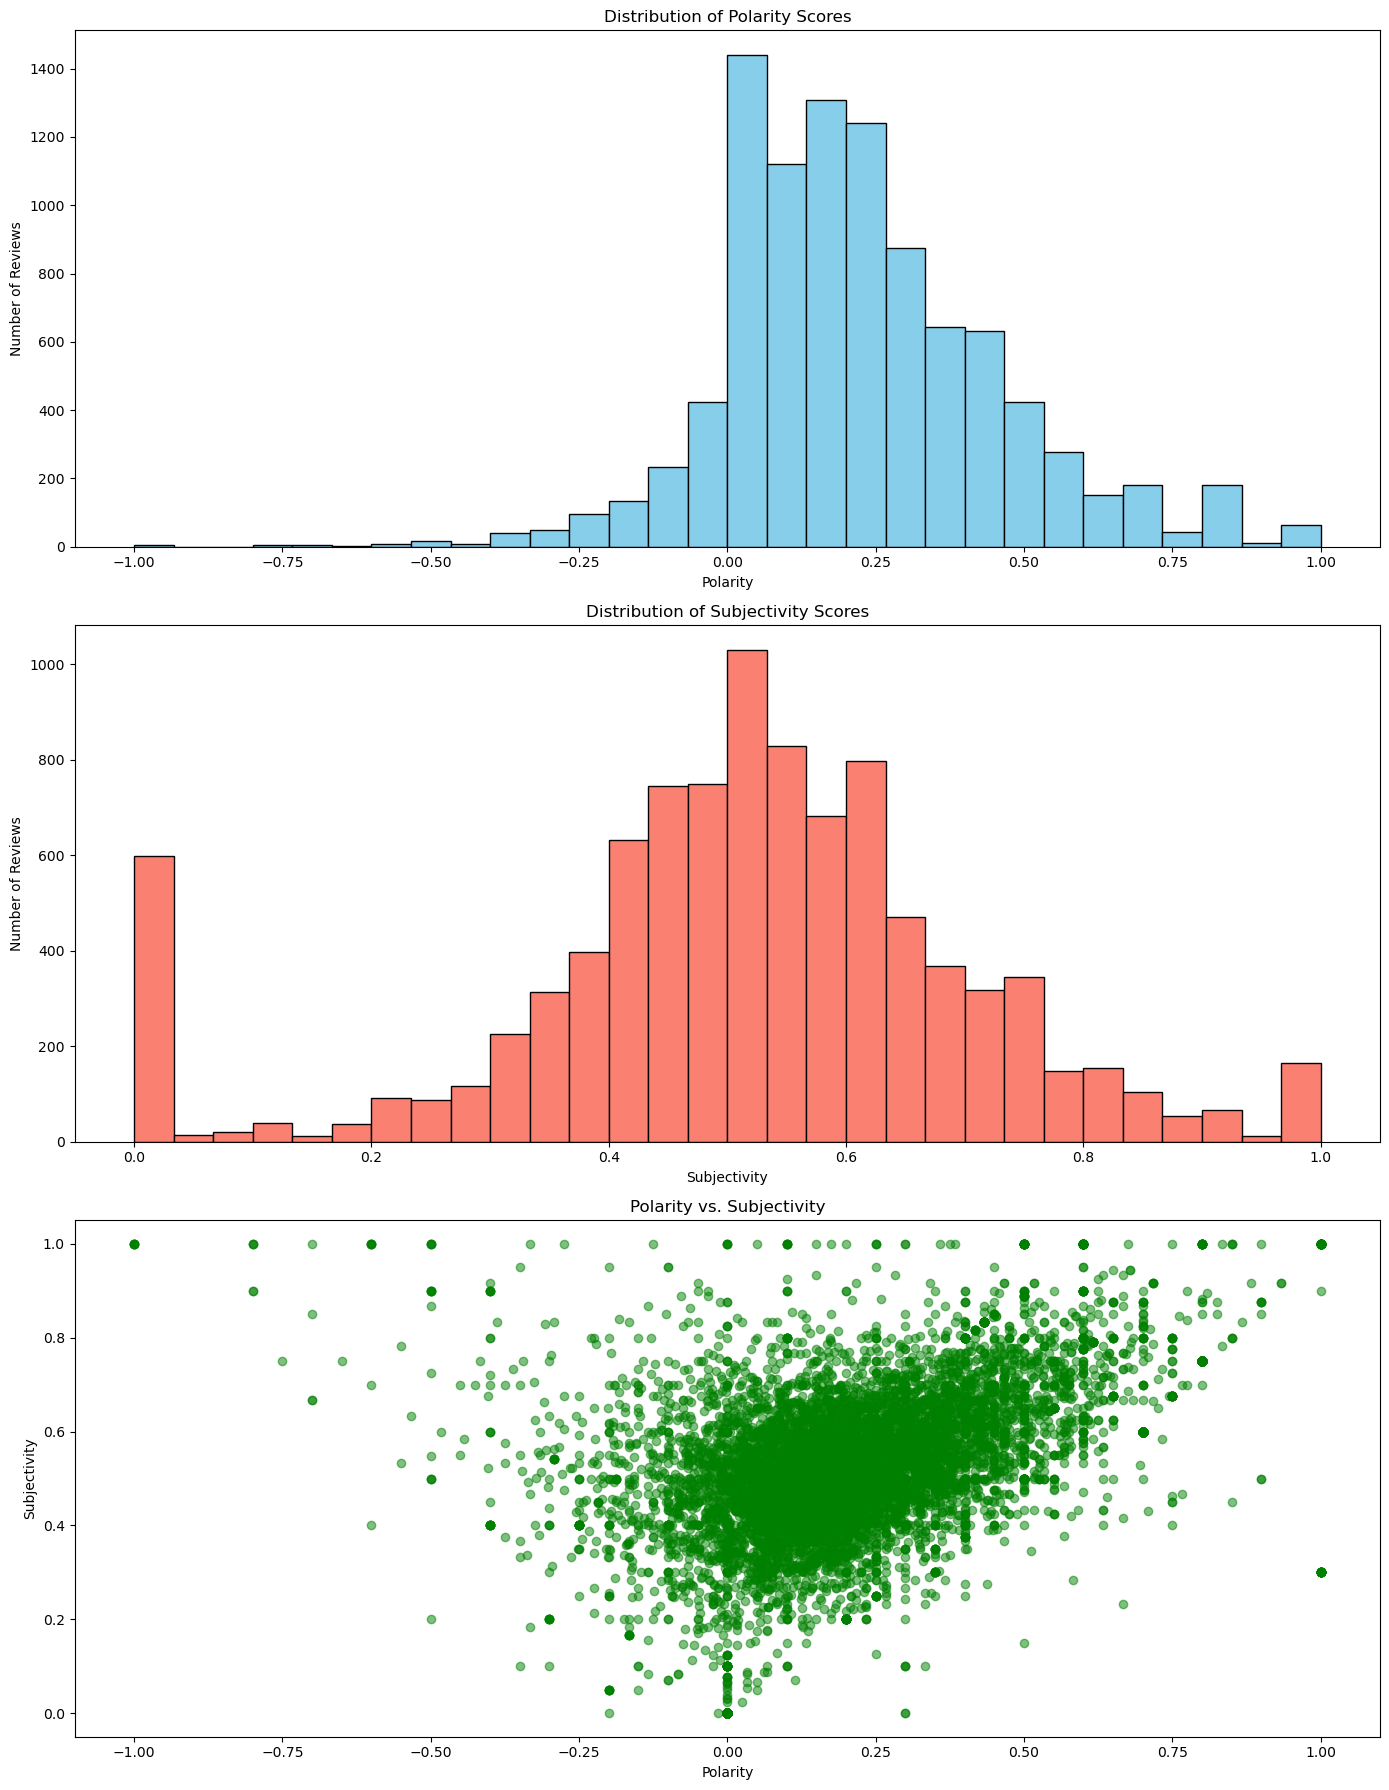

In [68]:
import matplotlib.pyplot as plt

# Setting up the figure and axes
fig, ax = plt.subplots(nrows=3, figsize=(14, 18))

# Plotting the histograms and scatter plot
ax[0].hist(df_mouse['Polarity'], bins=30, color='skyblue', edgecolor='black')
ax[0].set_title('Distribution of Polarity Scores')
ax[0].set_xlabel('Polarity')
ax[0].set_ylabel('Number of Reviews')

ax[1].hist(df_mouse['Subjectivity'], bins=30, color='salmon', edgecolor='black')
ax[1].set_title('Distribution of Subjectivity Scores')
ax[1].set_xlabel('Subjectivity')
ax[1].set_ylabel('Number of Reviews')

ax[2].scatter(df_mouse['Polarity'], df_mouse['Subjectivity'], alpha=0.5, color='green')
ax[2].set_title('Polarity vs. Subjectivity')
ax[2].set_xlabel('Polarity')
ax[2].set_ylabel('Subjectivity')

plt.tight_layout()
plt.show()

C:\Users\amine\AppData\Local\Temp\ipykernel_6304\3375890960.py:13: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


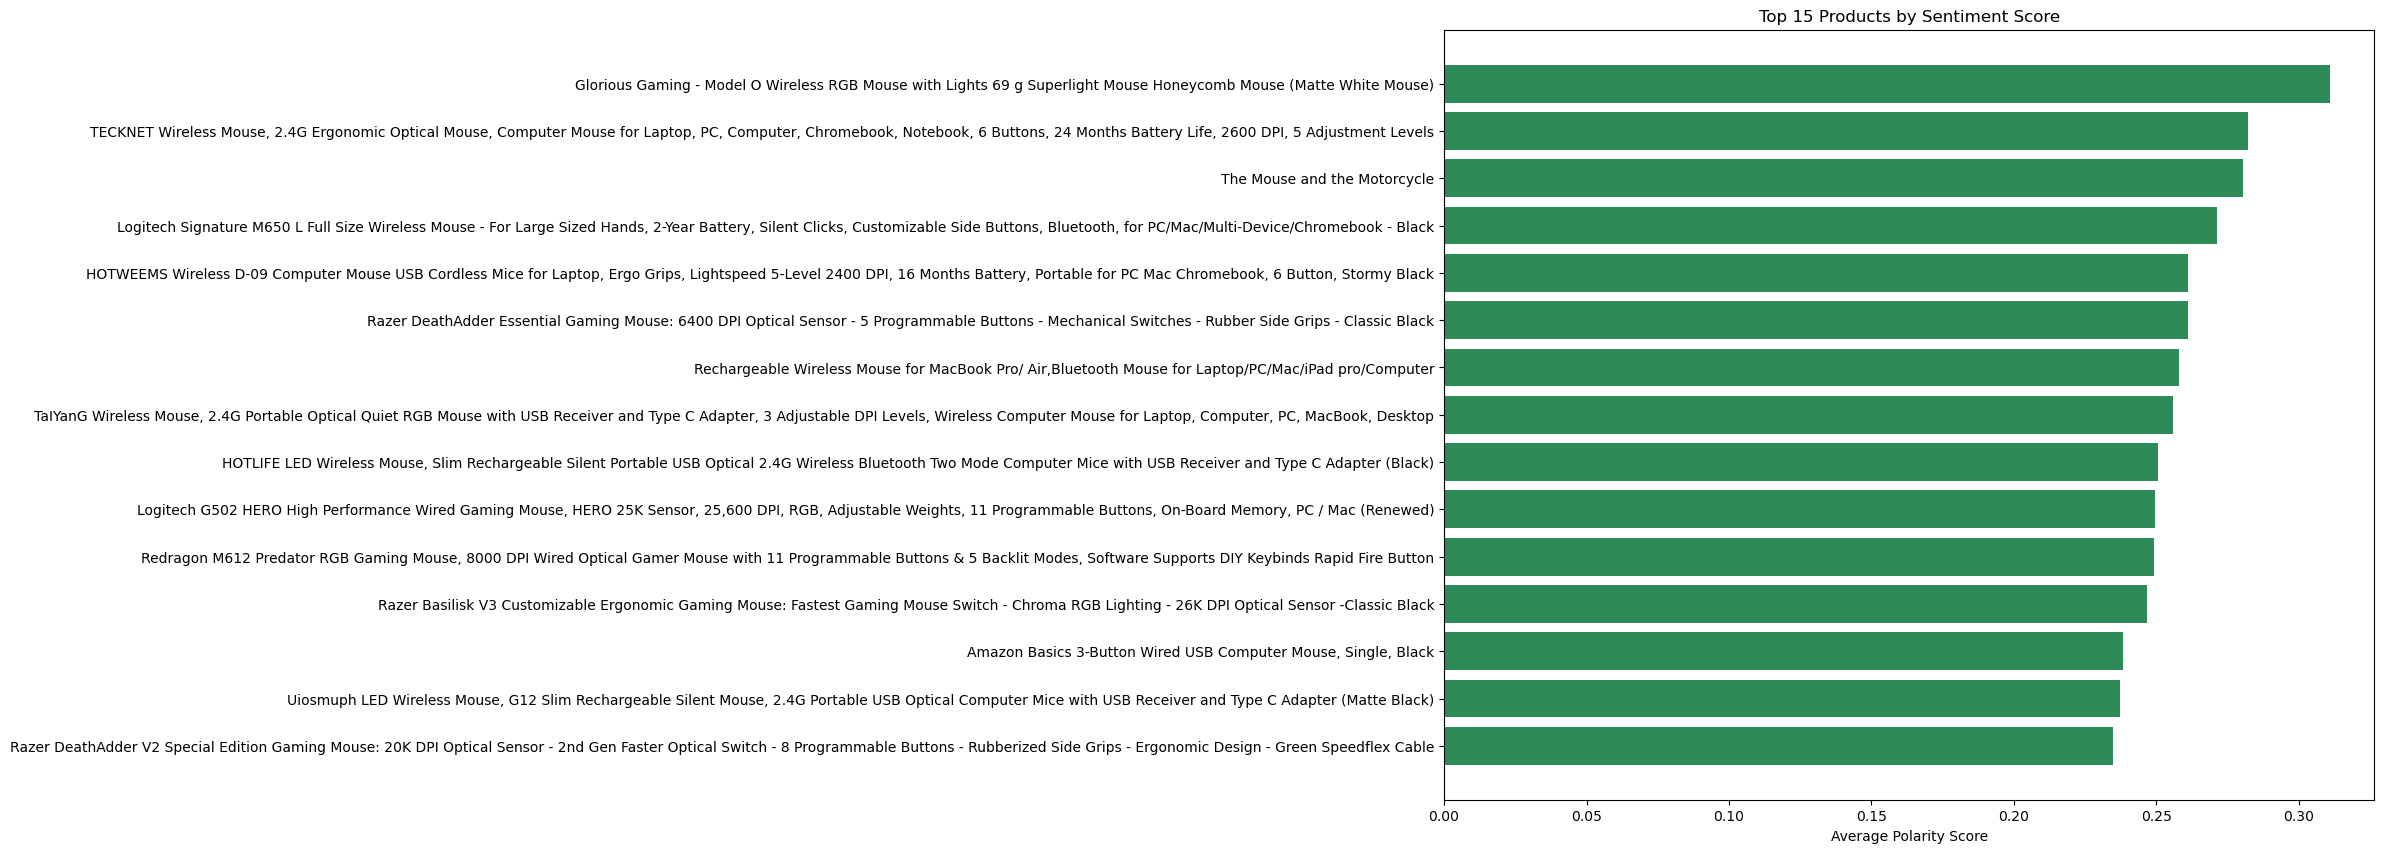

In [70]:
# Grouping by product name and calculating average polarity
product_sentiment = data.groupby('Headphone name').agg({'Polarity': 'mean'}).reset_index()

# Sorting products by their average polarity
sorted_products = product_sentiment.sort_values(by='Polarity', ascending=False)

# Visualizing the top 15 products by sentiment
plt.figure(figsize=(12, 10))
plt.barh(sorted_products['Headphone name'][:15], sorted_products['Polarity'][:15], color='seagreen')
plt.xlabel('Average Polarity Score')
plt.title('Top 15 Products by Sentiment Score')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [71]:
sorted_products

,Headphone name,Polarity
6,Glorious Gaming - Model O Wireless RGB Mouse w...,0.310922
42,"TECKNET Wireless Mouse, 2.4G Ergonomic Optical...",0.282205
45,The Mouse and the Motorcycle,0.280310
29,Logitech Signature M650 L Full Size Wireless M...,0.271428
9,HOTWEEMS Wireless D-09 Computer Mouse USB Cord...,0.261188
31,Razer DeathAdder Essential Gaming Mouse: 6400 ...,0.260986
37,Rechargeable Wireless Mouse for MacBook Pro/ A...,0.258118
44,"TaIYanG Wireless Mouse, 2.4G Portable Optical ...",0.255988
8,"HOTLIFE LED Wireless Mouse, Slim Rechargeable ...",0.250535
16,Logitech G502 HERO High Performance Wired Gami...,0.249529


In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict

data = df_mouse

# Preprocessing: Convert to lowercase, and remove punctuation and numbers
data['Cleaned Review Content'] = data['Cleaned Review Content'].str.lower().str.replace('[^\w\s]', '')

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(data['Cleaned Review Content'].fillna(''))

# Extracting top keywords based on their TF-IDF scores
feature_names = tfidf_vectorizer.get_feature_names_out()
word_scores = defaultdict(float)

# Summing up the TF-IDF scores for each word
for doc in tfidf_matrix:
    feature_index = doc.nonzero()[1]
    for i in feature_index:
        word_scores[feature_names[i]] += doc[0, i]

# Sorting words by their scores to get the top keywords
sorted_word_scores = sorted(word_scores.items(), key=lambda x: x[1], reverse=True)[:20]

# Extracting the top keywords
top_keywords = [word[0] for word in sorted_word_scores]
top_keywords


C:\Users\amine\AppData\Local\Temp\ipykernel_6304\828213405.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Cleaned Review Content'] = data['Cleaned Review Content'].str.lower().str.replace('[^\w\s]', '')
C:\Users\amine\AppData\Local\Temp\ipykernel_6304\828213405.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cleaned Review Content'] = data['Cleaned Review Content'].str.lower().str.replace('[^\w\s]', '')


['mouse',
 'work',
 'great',
 'good',
 'use',
 'button',
 'like',
 'hand',
 'battery',
 'feel',
 'click',
 'love',
 'scroll',
 'wheel',
 'time',
 'really',
 'price',
 'gaming',
 'issue',
 'using']

In [72]:
# Sorting the data by polarity to get top positive and negative reviews
sorted_reviews = data.sort_values(by='Polarity')

# Extracting the top 5 positive and negative reviews
top_positive_reviews = sorted_reviews.tail(5)[['Review Content', 'Polarity']]
top_negative_reviews = sorted_reviews.head(5)[['Review Content', 'Polarity']]

top_positive_reviews, top_negative_reviews

(                                         Review Content  Polarity
 7377  This is one of the greatest electronics that I...       1.0
 5989                 Awesome wheel control and features       1.0
 6722                                  Awesome product !       1.0
 6521          The best mouse and customer service ever!       1.0
 4155             Perfect size for our 9-year-old child.       1.0,
                                          Review Content  Polarity
 6640          It works but the battery life is terrible      -1.0
 4521   Muy bonito , súper chevere que se apague auto...      -1.0
 4750  Its a mouse and it works but the latency is te...      -1.0
 5536  Lo compré rebajado pensando que talvez sería b...      -1.0
 3566  All it took was one day. I had sore wrists and...      -1.0)